In [1]:
import nilmtk
from nilmtk.timeframe import TimeFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
TRAINING_DATA_DURATION = 12
delta_time = pd.to_timedelta(TRAINING_DATA_DURATION, unit='h')

# Building 1

In [4]:
redd = nilmtk.DataSet("redd.h5")

In [5]:
building_1 = redd.buildings[1].elec

In [6]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [7]:
building_1.available_ac_types('power')

['apparent', 'active']

In [8]:
building_1.submeters().available_ac_types('power')

['active']

In [9]:
building_1.submeters()

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

In [10]:
# building_1.plot_when_on(on_power_threshold = 40)

### Main Meter

In [11]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [12]:
main_meter = building_1.mains()[1]

In [13]:
start_time = main_meter.get_timeframe().start
end_time = start_time + delta_time

In [14]:
print("Start Time:", start_time)
print("End Time:",   end_time)

Start Time: 2011-04-18 09:22:09-04:00
End Time: 2011-04-18 21:22:09-04:00


In [15]:
kw = {'sections': [TimeFrame(start=start_time, end=end_time)], 'sample_period': 3, 'resample': True}

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:09-04:00    225.283325
2011-04-18 09:22:12-04:00    222.349991
2011-04-18 09:22:15-04:00    222.853333
2011-04-18 09:22:18-04:00    222.706665
2011-04-18 09:22:21-04:00    222.646667
                                ...    
2011-04-18 21:21:54-04:00    139.929993
2011-04-18 21:21:57-04:00    139.446671
2011-04-18 21:22:00-04:00    140.023331
2011-04-18 21:22:03-04:00    140.406662
2011-04-18 21:22:06-04:00    142.940002
Freq: 3s, Name: (power, apparent), Length: 14400, dtype: float32
GOOD


<Axes: >

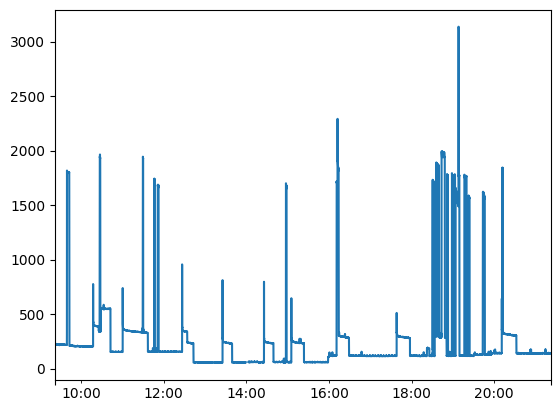

In [16]:
main_df = main_meter.power_series_all_data(**kw)
main_df.plot()

In [17]:
main_df = main_df.to_frame().fillna(0)

### Fridge

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    6.0
2011-04-18 09:22:15-04:00    6.0
2011-04-18 09:22:18-04:00    6.0
2011-04-18 09:22:21-04:00    6.0
2011-04-18 09:22:24-04:00    6.0
                            ... 
2011-04-18 21:21:54-04:00    7.0
2011-04-18 21:21:57-04:00    6.0
2011-04-18 21:22:00-04:00    6.0
2011-04-18 21:22:03-04:00    6.0
2011-04-18 21:22:06-04:00    6.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

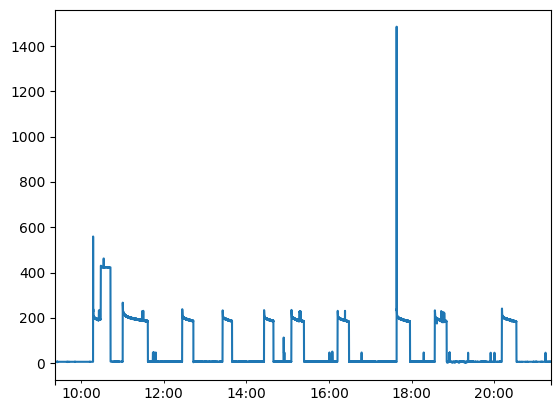

In [18]:
fridge = building_1['fridge']
fridge_df = fridge.power_series_all_data(**kw)
fridge_df.plot()

In [19]:
fridge_df = fridge_df.to_frame().fillna(0)

### Microwave

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    5.0
2011-04-18 09:22:15-04:00    5.0
2011-04-18 09:22:18-04:00    5.0
2011-04-18 09:22:21-04:00    5.0
2011-04-18 09:22:24-04:00    5.0
                            ... 
2011-04-18 21:21:54-04:00    4.0
2011-04-18 21:21:57-04:00    4.0
2011-04-18 21:22:00-04:00    4.0
2011-04-18 21:22:03-04:00    4.0
2011-04-18 21:22:06-04:00    4.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

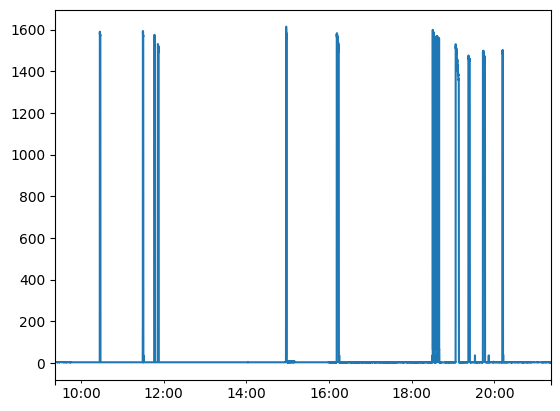

In [20]:
microwave = building_1['microwave']
microwave_df = microwave.power_series_all_data(**kw)
microwave_df.plot()

In [21]:
microwave_df = microwave_df.to_frame().fillna(0)

### Unknown

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    1.0
2011-04-18 09:22:15-04:00    1.0
2011-04-18 09:22:18-04:00    1.0
2011-04-18 09:22:21-04:00    1.0
2011-04-18 09:22:24-04:00    1.0
                            ... 
2011-04-18 21:21:54-04:00    1.0
2011-04-18 21:21:57-04:00    1.0
2011-04-18 21:22:00-04:00    1.0
2011-04-18 21:22:03-04:00    1.0
2011-04-18 21:22:06-04:00    1.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

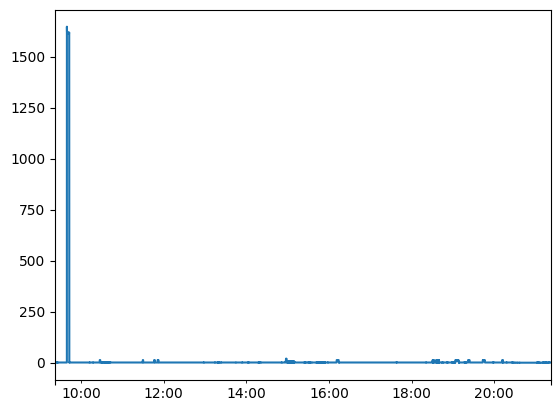

In [22]:
unknown = building_1['unknown']
unknown_df = unknown.power_series_all_data(**kw)
unknown_df.plot()

In [23]:
unknown_df = unknown_df.to_frame().fillna(0)

# FHMM: Fitting Hidden Markov Models

In [24]:
# FHMM functions
from nilmtk.feature_detectors import cluster
from nilmtk.disaggregate import Disaggregator, FHMMExact
from nilmtk.datastore import HDFDataStore
from hmmlearn import hmm

## Step 1: Cluster

In [25]:
from collections import OrderedDict
from nilmtk.disaggregate.fhmm_exact import sort_learnt_parameters, create_combined_hmm

In [26]:
# Initiate fhmm
m_fhmm = FHMMExact({'num_of_states':2})

In [27]:
train_appliances = [('fridge', fridge_df),
                    ('unknown', unknown_df)
                   ]

In [28]:
num_meters = len(train_appliances)
if num_meters > 12:
    max_num_clusters = 2
else:
    max_num_clusters = 3

In [29]:
learnt_model = OrderedDict()
for appliance, meter in train_appliances:
    meter_data = meter.dropna()
    X = meter_data.values.reshape((-1, 1))

    if not len(X):
        print("Submeter '{}' has no samples, skipping...".format(meter))
        continue

    assert X.ndim == 2
    m_fhmm.X = X

    if m_fhmm.num_of_states > 0:
        # User has specified the number of states for this appliance
        num_total_states = m_fhmm.num_of_states

    else:
        # Find the optimum number of states
        states = cluster(meter_data, max_num_clusters)
        num_total_states = len(states)

    print("\nTraining model for submeter '{}'".format(appliance))

    # GaussianHMM in hmm.py
    learnt_model[appliance] = hmm.GaussianHMM(num_total_states, "full")
    print("Model for " + appliance + " initiated: ", learnt_model[appliance])

    # Fit in base.py
    print("Estimating model parameters (fit)...")
    learnt_model[appliance].fit(X)
    print("Trained model for : " + appliance)


Training model for submeter 'fridge'
Model for fridge initiated:  GaussianHMM(covariance_type='full', n_components=2)
Estimating model parameters (fit)...
Trained model for : fridge

Training model for submeter 'unknown'
Model for unknown initiated:  GaussianHMM(covariance_type='full', n_components=2)
Estimating model parameters (fit)...
Trained model for : unknown


In [30]:
learnt_model

OrderedDict([('fridge', GaussianHMM(covariance_type='full', n_components=2)),
             ('unknown', GaussianHMM(covariance_type='full', n_components=2))])

In [31]:
# Combining to make a AFHMM
m_fhmm.meters = []
new_learnt_models = OrderedDict()

print("\n-----Individual models-----")
for meter in learnt_model:
    print("\n",meter)

    # sort_learnt_parameters in fhmm_exact.py
    startprob, means, covars, transmat = sort_learnt_parameters(
        learnt_model[meter].startprob_, learnt_model[meter].means_,
        learnt_model[meter].covars_, learnt_model[meter].transmat_)
            
    new_learnt_models[meter] = hmm.GaussianHMM(startprob.size, "full")
    new_learnt_models[meter].startprob_ = startprob
    new_learnt_models[meter].transmat_ = transmat
    new_learnt_models[meter].means_ = means
    new_learnt_models[meter].covars_ = covars
    
    print("startprob_:\n",new_learnt_models[meter].startprob_)
    print("transmat_:\n",new_learnt_models[meter].transmat_)
    print("means_:\n",new_learnt_models[meter].means_)

    # UGLY! But works.
    m_fhmm.meters.append(meter)
    
print("\nCombining parameters using Kronecker product...")

# create_combined_hmm in fhmm_exact.py
learnt_model_combined = create_combined_hmm(new_learnt_models)

m_fhmm.individual = new_learnt_models
m_fhmm.model = learnt_model_combined

print("Combined Model ", m_fhmm.model, " parameters:")
print("startprob_:\n", m_fhmm.model.startprob_)
print("transmat_:\n", m_fhmm.model.transmat_)
print("means_:\n", m_fhmm.model.means_)

print("\n.........................FHMM partial_fit end.........................")


-----Individual models-----

 fridge
startprob_:
 [1.00000000e+00 1.01900701e-35]
transmat_:
 [[0.99666822 0.00333178]
 [0.00811976 0.99188024]]
means_:
 [[  6.27110509]
 [200.65292847]]

 unknown
startprob_:
 [1. 0.]
transmat_:
 [[9.99930216e-01 6.97836707e-05]
 [1.47058824e-02 9.85294118e-01]]
means_:
 [[1.30939920e+00]
 [1.61832353e+03]]

Combining parameters using Kronecker product...
Combined Model  GaussianHMM(covariance_type='full', n_components=4)  parameters:
startprob_:
 [1.00000000e+00 0.00000000e+00 1.01900701e-35 0.00000000e+00]
transmat_:
 [[9.96598674e-01 6.95511672e-05 3.33154259e-03 2.32503496e-07]
 [1.46568857e-02 9.82011339e-01 4.89966926e-05 3.28277840e-03]
 [8.11919573e-03 5.66626822e-07 9.91811021e-01 6.92170439e-05]
 [1.19408270e-04 8.00035409e-03 1.45864741e-02 9.77293764e-01]]
means_:
 [[   7.58050429]
 [1624.5946345 ]
 [ 201.96232768]
 [1818.97645789]]

.........................FHMM partial_fit end.........................


## Step 2: Export Model

In [32]:
import pickle

In [33]:
def export_model(model, filename):
    example_dict = model
    with open(filename, "wb") as pickle_out:
        pickle.dump(example_dict, pickle_out)

In [34]:
export_model(m_fhmm, 'm_fhmm.pickle')

## Step 3: Import Model

In [35]:
def import_model(filename):
    with open(filename, "rb") as pickle_in:
        model = pickle.load(pickle_in)
    return model

In [36]:
m_fhmm_load = import_model('m_co.pickle')

## Step 4: Testing

In [37]:
from nilmtk.disaggregate.fhmm_exact import decode_hmm

In [38]:
app_df_predicted = m_fhmm.disaggregate_chunk([main_df])[0]

In [39]:
fridge_df_predicted = app_df_predicted['fridge']
unknown_df_predicted = app_df_predicted['unknown']

In [40]:
fridge_df_predicted.index = main_df.index
unknown_df_predicted.index = main_df.index

Text(0.5, 0, 'Timestamp')

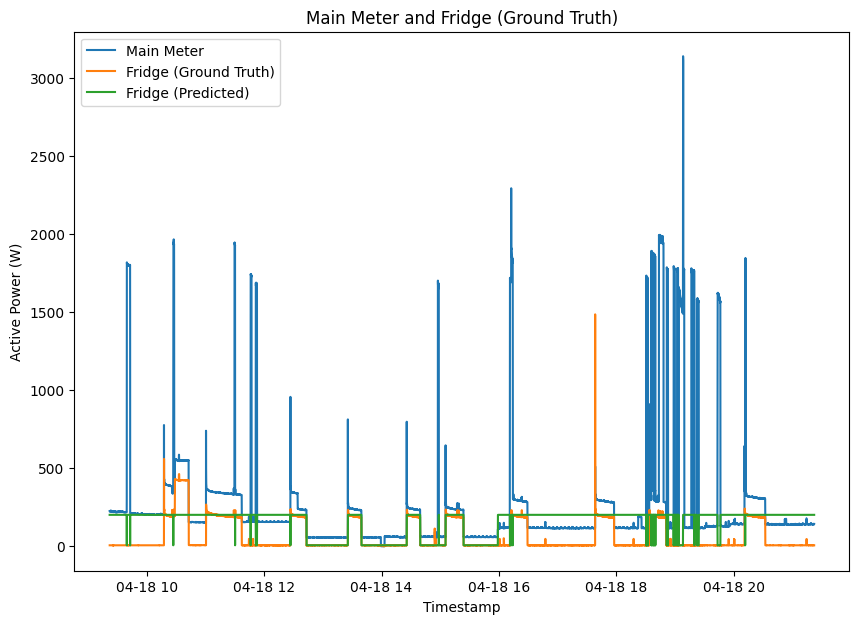

In [41]:
# Plot Fridge
fig = plt.figure(figsize=(10, 7))
plt.plot(main_df, label = 'Main Meter')
plt.plot(fridge_df, label = 'Fridge (Ground Truth)')
plt.plot(fridge_df_predicted, label = 'Fridge (Predicted)')

plt.title("Main Meter and Fridge (Ground Truth)")
plt.legend()
plt.ylabel("Active Power (W)")
plt.xlabel("Timestamp")

Text(0.5, 0, 'Timestamp')

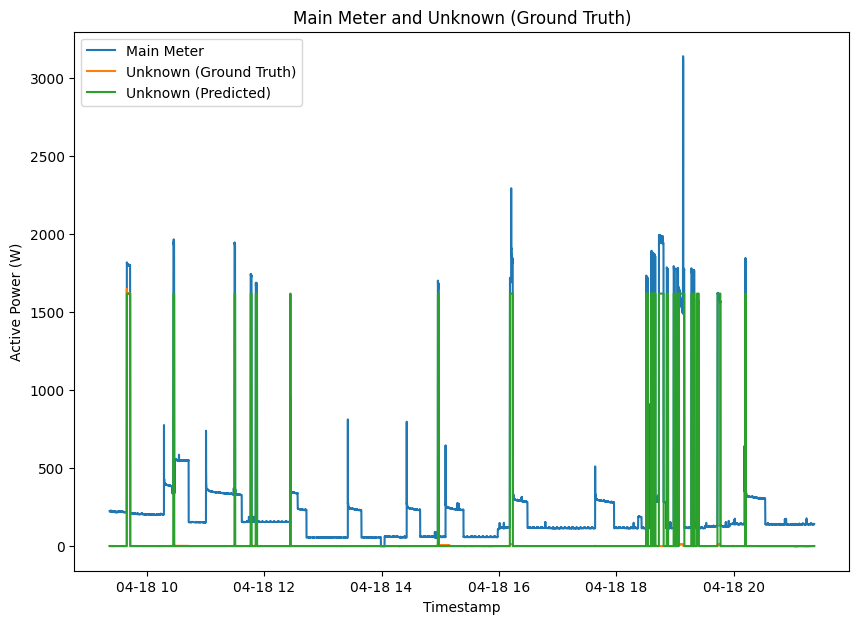

In [42]:
# Plot Unknown
fig = plt.figure(figsize=(10, 7))
plt.plot(main_df, label = 'Main Meter')
plt.plot(unknown_df, label = 'Unknown (Ground Truth)')
plt.plot(unknown_df_predicted, label = 'Unknown (Predicted)')

plt.title("Main Meter and Unknown (Ground Truth)")
plt.legend()
plt.ylabel("Active Power (W)")
plt.xlabel("Timestamp")